In [1]:
from train import train_model
from utils import load_config, load_model, inference
from utils import visualize_output, get_keypoints_from_heatmaps
import cv2
import numpy as np
from dataset import PoseDataset
import torch

In [9]:
config = load_config('./config_w48_384x288.yaml')
config['model']['weights'] = 'runs/20240918_205337/checkpoint_epoch_5/weights_epoch_5.pth'

In [10]:
dataset = PoseDataset(config["dataset"], config["dataset"]['val'])
# get one sample from the dataset
# image,target,keypoints_gt,keypoint_visibility = dataset[334]
# image,target,keypoints_gt,keypoint_visibility = dataset[632]
image,target,keypoints_gt,keypoint_visibility = dataset[191]

In [4]:
# image = cv2.imread("./example_images/demo_cropped.jpg")
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
# image = cv2.resize(image, (384, 288))
# image = image.transpose(2, 0, 1)
# image = image.astype(np.float32)
# image /= 255.0

# image = torch.tensor(image)

In [11]:
result = inference(config, image.unsqueeze(0))

keypoints = get_keypoints_from_heatmaps(result, (image.shape[1], image.shape[2]))

In [12]:
config = load_config('./config_w48_384x288.yaml')
result = inference(config, image.unsqueeze(0))

keypoints_org = get_keypoints_from_heatmaps(result, (image.shape[1], image.shape[2]))
print(image.shape)

torch.Size([3, 384, 288])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


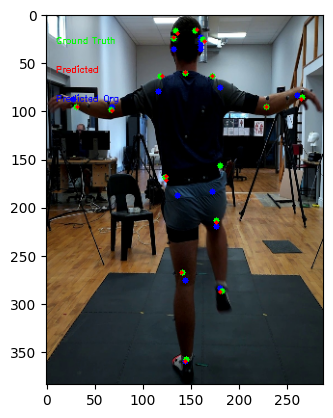

In [13]:
import matplotlib.pyplot as plt

image_show = image.permute(1,2,0).numpy()
# image_show = cv2.cvtColor(image_show, cv2.COLOR_RGB2BGR)


for i in range(keypoints_org.shape[1]):
    cv2.circle(image_show, (int(keypoints_org[0][i][0]), int(keypoints_org[0][i][1])), 3, (0,0,255), -1)

for i in range(len(keypoints_gt)):
    cv2.circle(image_show, (int(keypoints_gt[i][0]), int(keypoints_gt[i][1])), 3, (0,255,0), -1)

for i in range(keypoints.shape[1]):
    cv2.circle(image_show, (int(keypoints[0][i][0]), int(keypoints[0][i][1])), 2, (255,0,0), -1)

# add labels
cv2.putText(image_show, 'Ground Truth', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 255, 0), 1)
cv2.putText(image_show, 'Predicted', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1)
cv2.putText(image_show, 'Predicted Org', (10, 90), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 255), 1)

# show image in notebook cell with matplotlib
plt.imshow(image_show)
plt.show()